In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/WineQT.csv")

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,NaN,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1141.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.533348,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.356803,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Data Preprocessing

In [ ]:
# Check for null values
print(df.isnull().sum())

# Fill missing values for 'residual sugar' with mean
df['residual sugar'] = df['residual sugar'].fillna(df['residual sugar'].mean())

# Fill missing values for 'chlorides' with mean
df['chlorides'] = df['chlorides'].fillna(df['chlorides'].mean())

# Fill missing values for 'volatile acidity' with mean
df['volatile acidity'] = df['volatile acidity'].fillna(df['volatile acidity'].mean())

# Fill missing values for 'citric acid' with mean
df['citric acid'] = df['citric acid'].fillna(df['citric acid'].mean())

# Recheck null values
print(df.isnull().sum())

# Export cleaned dataset to new csv file
df.to_csv('WineQT_cleaned.csv', index=False)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          2
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.900000,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.600000,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.300000,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.900000,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,2.533348,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Scaling

In [ ]:
# Load cleaned dataset
df = pd.read_csv('WineQT_cleaned.csv')

# List of numerical columns to scale
num_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
            'density', 'pH', 'sulphates', 'alcohol']

# Create scaler object
scaler = MinMaxScaler()

# Scale numerical features
df[num_cols] = scaler.fit_transform(df[num_cols])

# Export scaled dataset to new file
df.to_csv('WineQT_scaled.csv', index=False)

In [ ]:
correlations=df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.121970
volatile acidity       -0.407394
citric acid             0.240821
residual sugar          0.021287
chlorides              -0.124085
free sulfur dioxide    -0.063260
total sulfur dioxide   -0.183339
density                -0.175208
pH                     -0.052453
sulphates               0.257710
alcohol                 0.484866
Id                      0.069708
Name: quality, dtype: float64


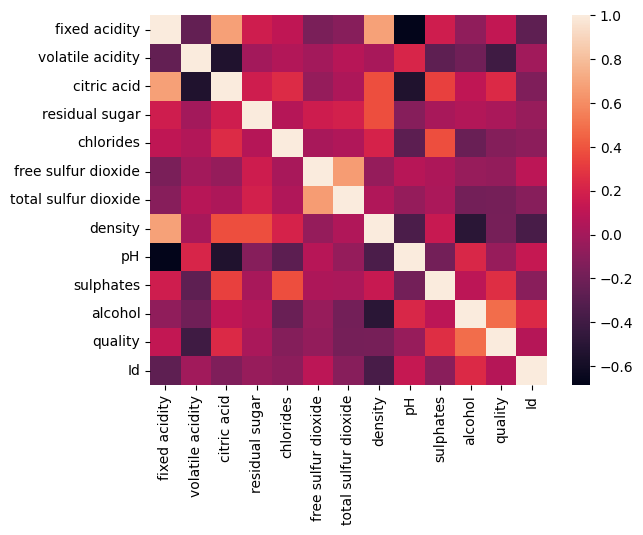

In [ ]:
sns.heatmap(df.corr())
plt.show()

In [ ]:
def get_features(correlation_threshold):
  abs_corrs=correlations.abs()
  high_correlations = abs_corrs[abs_corrs> correlation_threshold].index.values.tolist()
  return high_correlations


In [ ]:
features=get_features(0.05)
print(features)
x=df[features]
y=df['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'Id']


In [ ]:
#x

In [ ]:
#y

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

Linear Regression Model

In [ ]:
#fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
#this gives the coefficients of the 10 features selected above.
print(regressor.coef_)

[ 2.07932257e-01 -1.61531216e+00 -1.09293381e-01 -9.78026868e-01
  2.16173394e-01 -8.52493255e-01 -2.53022231e-01 -5.33601037e-01
  1.57295226e+00  1.66635730e+00 -1.79450771e-05]


In [ ]:
train_pred = regressor.predict(x_train)
print(train_pred)

[6.38751978 6.34963116 4.86674721 5.93025676 4.72875815 5.35018324
 5.12649514 5.8113873  5.9796602  6.42830763 4.9254094  4.8927923
 5.35547278 6.14999935 6.77637539 5.36842642 5.61950091 5.61875267
 5.77040291 5.06689209 6.15167807 5.16867546 5.83410447 5.39601564
 5.59202605 5.81231689 5.75208958 5.32128974 6.36161367 6.16867425
 5.11296728 6.43831324 5.84390274 5.18958334 5.14832027 6.28887977
 5.87977949 6.64758602 5.36212657 5.97726057 6.25074452 6.08918251
 5.38431664 5.677163   5.58443847 6.02207484 5.38665568 5.83188358
 5.04199267 5.41860999 5.51330171 5.42117976 6.14915612 5.74857852
 5.27002408 5.10106914 5.82464547 5.35545483 5.34966542 5.19876824
 6.23459348 6.18519762 5.390721   5.99619494 6.06702771 5.18693708
 5.02898523 5.62981511 6.31565008 6.39066648 6.17378188 5.19017527
 5.36021953 5.84429437 5.24054831 5.12818647 5.35293276 5.77089998
 5.18618664 5.03028125 5.68799864 5.67714084 5.29999854 5.07211166
 5.81053812 5.01105435 5.37736873 5.1345973  5.35318764 5.78389

In [ ]:
test_pred = regressor.predict(x_test)
print(test_pred)

[5.75238878 5.95141856 5.94305381 5.64465627 6.54407497 5.82975049
 5.27188958 6.14920996 5.23260681 6.1250852  6.5689993  5.94592882
 5.10827773 5.62586227 5.31818059 5.83627294 5.15616444 4.87882124
 5.85558409 6.48433148 5.40887807 4.90039916 5.05704621 6.16744232
 4.94652183 5.38147647 5.93006589 5.9955001  5.02321449 5.28312648
 5.70083819 6.37406872 5.06993144 5.64776359 5.68525628 5.28558424
 5.23432671 6.06438377 5.28778455 6.50073572 5.4683769  5.22046939
 6.4648261  5.41489113 5.92398671 5.15263947 5.69495857 6.55388091
 5.60449472 6.72191797 6.6437125  5.57394839 5.63003496 6.44922193
 5.35800757 6.47940458 5.68394721 5.14347543 6.50146766 5.34547063
 6.17065861 6.8804855  5.7303757  5.48291395 5.83868352 5.810629
 5.22961883 5.58442053 5.09732477 5.28309267 5.31497462 5.08663731
 5.29992939 6.00018905 6.62672124 5.74763034 5.62626356 5.19214953
 5.37496831 6.03109876 5.53748331 5.22887345 5.61128191 5.2042564
 5.77645991 4.79226685 5.50193478 5.94737353 6.91410121 4.9912421

In [ ]:
train_rmse = metrics.mean_squared_error(train_pred,y_train)**0.5
print(train_rmse)

0.6343945564870849


In [ ]:
test_rmse = metrics.mean_squared_error(test_pred, y_test) ** 0.5
print(train_rmse)

0.6343945564870849


In [ ]:
# The root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample and population values) predicted by a model and the values actually observed.
# The RMSE for your training and your test sets should be very similar if you have built a good model.
# If the RMSE for the test set is much higher than that of the training set, it is likely that you've badly over fit the data

In [ ]:
# rounding off the predicted values for test set
predicted_data = np.round_(test_pred)
predicted_data

array([6., 6., 6., 6., 7., 6., 5., 6., 5., 6., 7., 6., 5., 6., 5., 6., 5.,
       5., 6., 6., 5., 5., 5., 6., 5., 5., 6., 6., 5., 5., 6., 6., 5., 6.,
       6., 5., 5., 6., 5., 7., 5., 5., 6., 5., 6., 5., 6., 7., 6., 7., 7.,
       6., 6., 6., 5., 6., 6., 5., 7., 5., 6., 7., 6., 5., 6., 6., 5., 6.,
       5., 5., 5., 5., 5., 6., 7., 6., 6., 5., 5., 6., 6., 5., 6., 5., 6.,
       5., 6., 6., 7., 5., 5., 6., 7., 7., 6., 6., 5., 6., 6., 6., 6., 7.,
       5., 6., 5., 5., 6., 5., 6., 6., 5., 5., 6., 6., 4., 5., 5., 5., 6.,
       6., 6., 5., 5., 5., 5., 5., 5., 6., 5., 5., 6., 6., 5., 5., 7., 6.,
       6., 6., 5., 6., 5., 5., 6., 5., 7., 6., 6., 6., 6., 6., 5., 6., 6.,
       6., 7., 5., 5., 5., 6., 5., 6., 5., 5., 6., 5., 6., 6., 6., 6., 6.,
       6., 5., 5., 6., 6., 5., 6., 5., 5., 5., 6., 6., 5., 6., 6., 5., 7.,
       6., 6., 6., 5., 7., 5., 6., 6., 6., 7., 6., 5., 6., 5., 6., 5., 5.,
       5., 6., 5., 5., 6., 7., 5., 6., 6., 6., 6., 6., 5., 6., 5., 6., 5.,
       5., 6., 5., 6., 5.

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

Mean Absolute Error: 0.49876847404767694
Mean Squared Error: 0.4209796409447223
Root Mean Squared Error: 0.6488294390244036


In [ ]:
coeffecients = pd.DataFrame(regressor.coef_,features)
coeffecients.columns = ['Coeffecient']
print(coeffecients)
#These numbers mean that holding all other features fixed, a 1 unit increase in suplhates will lead to an increase of 0.8 in Quality of wine, and similarly for the other features
#These numbers mean that holding all other features fixed, a 1 unit increase in volatile acidity will lead to a decrease of 0.9

                      Coeffecient
fixed acidity            0.207932
volatile acidity        -1.615312
citric acid             -0.109293
chlorides               -0.978027
free sulfur dioxide      0.216173
total sulfur dioxide    -0.852493
density                 -0.253022
pH                      -0.533601
sulphates                1.572952
alcohol                  1.666357
Id                      -0.000018


In [ ]:
#Accuracy
regressor_accuracy = accuracy_score(y_test, predicted_data.round())*100
print("Linear Regression Accuracy: {:.2f}%".format(regressor_accuracy))

Linear Regression Accuracy: 63.64%


Ridge Regression Model

In [ ]:
from sklearn.linear_model import Ridge
rid = Ridge()
print(rid.fit(x_train, y_train))

Ridge()


In [ ]:
print(rid.coef_)

[ 3.06518262e-01 -1.50496867e+00 -2.79100639e-02 -7.67414169e-01
  1.54135777e-01 -7.35045787e-01 -3.46805604e-01 -3.72084705e-01
  1.37356085e+00  1.58727908e+00 -8.77699690e-06]


In [ ]:
train_pred = rid.predict(x_train)
print(train_pred)

[6.35583495 6.3285279  4.90507452 5.9563373  4.78723175 5.35216795
 5.16878684 5.77872628 5.94379807 6.38028242 4.96569483 4.9394259
 5.37348009 6.13655523 6.73661209 5.37887971 5.62420742 5.6086138
 5.79129431 5.07929869 6.13507966 5.20817304 5.82218608 5.40202804
 5.57992132 5.79219661 5.74333173 5.32217192 6.36769628 6.20887027
 5.15428117 6.40127769 5.85004509 5.21237157 5.16061001 6.2706988
 5.88477274 6.48248895 5.40386972 5.9820812  6.21624022 6.08965189
 5.36209271 5.66485051 5.5840715  6.00042691 5.40734647 5.80787339
 5.13297177 5.42853121 5.49679214 5.44668449 6.15587691 5.76387321
 5.24776956 5.11078504 5.79881865 5.37347131 5.39558417 5.20220961
 6.18353552 6.16832777 5.38674986 5.99848837 6.01777387 5.22413808
 5.06166106 5.60456372 6.26649262 6.32806434 6.16331115 5.23457399
 5.33045134 5.86304925 5.24220803 5.17338875 5.32639997 5.74285022
 5.22100963 5.06971863 5.66544732 5.69371084 5.30399887 5.08563921
 5.86894126 5.0220492  5.37255309 5.13363027 5.3525095  5.7869670

In [ ]:
test_pred = rid.predict(x_test)
print(test_pred)

[5.75766463 5.95288262 5.94694904 5.62754939 6.49872177 5.83491193
 5.27408452 6.15590324 5.27568182 6.11846227 6.56732575 5.92200903
 5.15730171 5.61446799 5.34755832 5.81397858 5.16841419 4.92053735
 5.84242194 6.44981796 5.40566039 4.94047336 5.0896618  6.15442868
 4.99405076 5.40047124 5.94266694 5.963727   5.03711826 5.29328338
 5.69142076 6.3442163  5.10184724 5.63588252 5.63542454 5.30418997
 5.26116613 6.08889935 5.28164055 6.48867017 5.47319412 5.25585017
 6.4442162  5.39681194 5.92184806 5.17779467 5.68881281 6.50185522
 5.58621629 6.66165613 6.58449735 5.56470295 5.62924441 6.36953143
 5.35415494 6.44024714 5.66853529 5.17248668 6.44259649 5.36036216
 6.13067541 6.78456806 5.718965   5.51990875 5.82974511 5.7683851
 5.25854884 5.58406272 5.14136257 5.28133691 5.34111373 5.08500245
 5.30707762 5.9392531  6.50606144 5.75878848 5.62541299 5.1848597
 5.38142892 6.02180588 5.53499041 5.25376837 5.61842094 5.21669021
 5.75556057 4.87071238 5.49958635 5.88983809 6.85883595 4.999997

In [ ]:
train_rmse = metrics.mean_squared_error(train_pred,y_train)**0.5
print(train_rmse)

0.635150625948765


In [ ]:
test_rmse = metrics.mean_squared_error(test_pred, y_test) ** 0.5
print(train_rmse)

0.635150625948765


In [ ]:
predicted_data = np.round_(test_pred)
predicted_data

array([6., 6., 6., 6., 6., 6., 5., 6., 5., 6., 7., 6., 5., 6., 5., 6., 5.,
       5., 6., 6., 5., 5., 5., 6., 5., 5., 6., 6., 5., 5., 6., 6., 5., 6.,
       6., 5., 5., 6., 5., 6., 5., 5., 6., 5., 6., 5., 6., 7., 6., 7., 7.,
       6., 6., 6., 5., 6., 6., 5., 6., 5., 6., 7., 6., 6., 6., 6., 5., 6.,
       5., 5., 5., 5., 5., 6., 7., 6., 6., 5., 5., 6., 6., 5., 6., 5., 6.,
       5., 5., 6., 7., 5., 5., 6., 6., 7., 6., 6., 5., 6., 6., 6., 6., 6.,
       5., 6., 5., 5., 6., 5., 6., 6., 5., 5., 6., 6., 4., 5., 5., 5., 6.,
       6., 6., 5., 5., 5., 5., 5., 5., 6., 5., 5., 6., 6., 5., 6., 7., 6.,
       6., 6., 5., 6., 5., 5., 6., 5., 7., 6., 6., 6., 5., 6., 5., 6., 6.,
       6., 6., 5., 5., 5., 6., 5., 6., 5., 5., 6., 5., 6., 6., 6., 6., 6.,
       6., 5., 5., 6., 6., 5., 6., 5., 5., 6., 6., 6., 5., 6., 6., 5., 6.,
       6., 6., 6., 5., 7., 5., 6., 6., 6., 6., 6., 5., 6., 5., 6., 5., 5.,
       5., 6., 5., 5., 6., 7., 5., 6., 6., 6., 6., 6., 5., 6., 5., 6., 5.,
       5., 6., 5., 6., 5.

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

Mean Absolute Error: 0.5028867261266768
Mean Squared Error: 0.4238003883334677
Root Mean Squared Error: 0.6509995302098671


In [ ]:
coeffecients = pd.DataFrame(rid.coef_,features)
coeffecients.columns = ['Coeffecient']
print(coeffecients)

                      Coeffecient
fixed acidity            0.306518
volatile acidity        -1.504969
citric acid             -0.027910
chlorides               -0.767414
free sulfur dioxide      0.154136
total sulfur dioxide    -0.735046
density                 -0.346806
pH                      -0.372085
sulphates                1.373561
alcohol                  1.587279
Id                      -0.000009


In [ ]:
#Accuracy
rid_accuracy = accuracy_score(y_test, predicted_data.round())*100
print("Ridge Regression Accuracy: {:.2f}%".format(rid_accuracy))

Ridge Regression Accuracy: 59.79%
